In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Display options
pd.set_option('display.max_columns', None)
# 1. Load Dataset
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\data sci project\customer_support_tickets.csv")
print("Initial Shape:", df.shape)
df.head()


Initial Shape: (8469, 19)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Hours,SLA Breach
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,3/22/2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,6/1/2023 12:15,NaN,NaN,NaN,0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,5/22/2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,6/1/2023 16:45,NaN,NaN,NaN,0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,7/14/2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,6/1/2023 11:14,6/1/2023 18:05,3.0,6.85,0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,11/13/2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,6/1/2023 7:29,6/1/2023 1:57,3.0,NaN,0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2/4/2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,6/1/2023 0:12,6/1/2023 19:53,1.0,19.68,0


In [9]:
sns.set(style="whitegrid")

In [10]:
# ------------------------------------------
# 3. FIX INCORRECT DATATYPES
# ------------------------------------------

# Convert date columns to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

# Convert numeric values properly
df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')
df['Customer Satisfaction Rating'] = pd.to_numeric(df['Customer Satisfaction Rating'], errors='coerce')


In [11]:
# 4. RE-CALCULATE RESOLUTION HOURS
df['Resolution_Hours'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600

# Negative values = invalid → set to NaN
df.loc[df['Resolution_Hours'] < 0, 'Resolution_Hours'] = np.nan


In [12]:
# 5. CREATE SLA BREACH FLAG
df['SLA_Breach'] = df['Resolution_Hours'].apply(
    lambda x: 1 if pd.notnull(x) and x > 24 else 0
)


In [13]:
df = df.copy()
# Convert types first (coerce errors to NaN)
df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')
df['Customer Satisfaction Rating'] = pd.to_numeric(df['Customer Satisfaction Rating'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
# Impute
df.loc[:, 'Customer Age'] = df['Customer Age'].fillna(df['Customer Age'].median())
df.loc[:, 'Customer Gender'] = df['Customer Gender'].fillna("Unknown")
df.loc[:, 'Ticket Subject'] = df['Ticket Subject'].fillna("")
df.loc[:, 'Ticket Description'] = df['Ticket Description'].fillna("")
df.loc[:, 'Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(
    df['Customer Satisfaction Rating'].median()
)



In [14]:
print("DATASET SHAPE:", df.shape)

DATASET SHAPE: (8469, 21)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

In [16]:
df.isnull()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Hours,SLA Breach,Resolution_Hours,SLA_Breach
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False
8465,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False
8466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
8467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [17]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating       0
Resolution Hours                7065
SLA Breach                         0
Resolution_Hours                7065
SLA_Breach                         0
dtype: int64

In [18]:
df.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Hours,SLA Breach,Resolution_Hours,SLA_Breach
count,8469.000000,8469.000000,8469,5650,2769,8469.000000,1404.000000,8469.0,1404.000000,8469.0
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:26:17.617699328,2023-06-01 11:16:51.722643456,2.997166,7.577977,0.0,7.577932,0.0
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:00,2023-05-31 21:53:00,1.000000,0.000000,0.0,0.000000,0.0
25%,2118.000000,31.000000,2020-07-02 00:00:00,2023-06-01 05:24:00,2023-06-01 05:34:00,3.000000,3.000000,0.0,3.000000,0.0
50%,4235.000000,44.000000,2020-12-31 00:00:00,2023-06-01 11:26:00,2023-06-01 11:17:00,3.000000,6.345000,0.0,6.341667,0.0
75%,6352.000000,57.000000,2021-07-01 00:00:00,2023-06-01 17:37:00,2023-06-01 17:07:00,3.000000,11.355000,0.0,11.354167,0.0
max,8469.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:00,2023-06-02 00:55:00,5.000000,23.470000,0.0,23.466667,0.0
std,2444.934048,15.296112,NaN,NaN,NaN,0.804446,5.596640,0.0,5.596637,0.0


lets start with visualization part

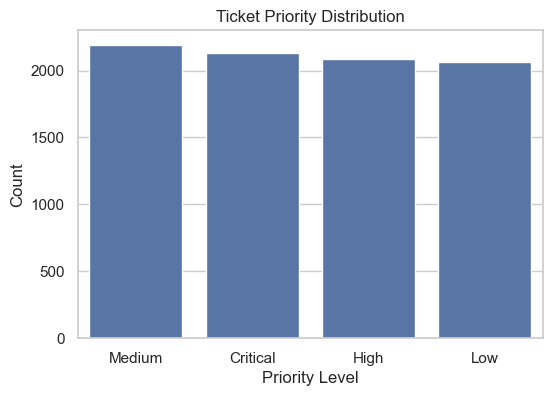

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ticket Priority',order=df['Ticket Priority'].value_counts().index)
plt.title("Ticket Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Count")
plt.show()


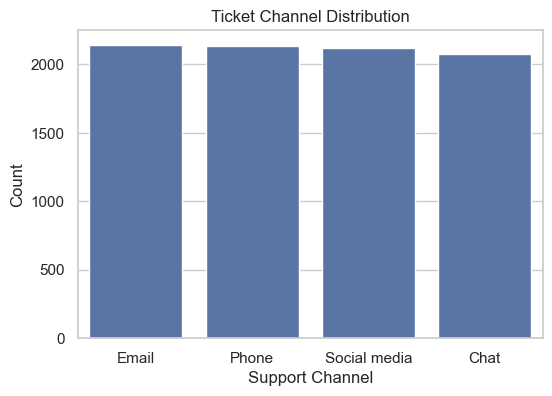

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ticket Channel',order=df['Ticket Channel'].value_counts().index)
plt.title("Ticket Channel Distribution")
plt.xlabel("Support Channel")
plt.ylabel("Count")
plt.show()


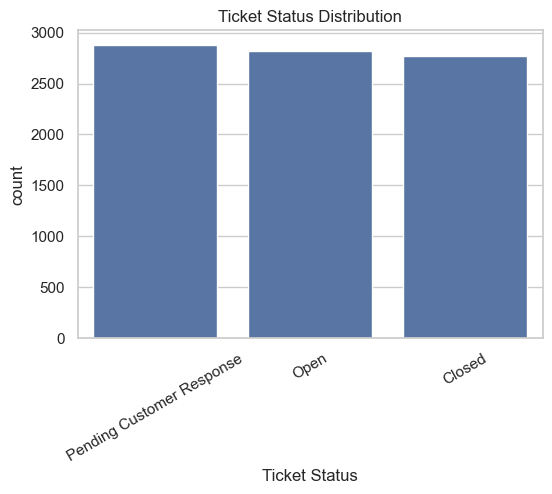

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ticket Status',order=df['Ticket Status'].value_counts().index)
plt.xticks(rotation=30)
plt.title("Ticket Status Distribution")
plt.show()


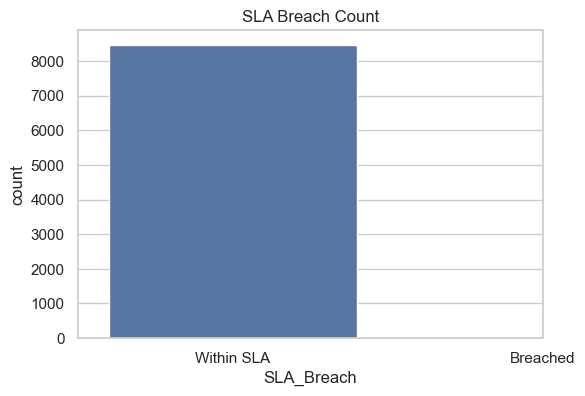

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SLA_Breach')
plt.xticks([0,1], ['Within SLA','Breached'])
plt.title("SLA Breach Count")
plt.show()


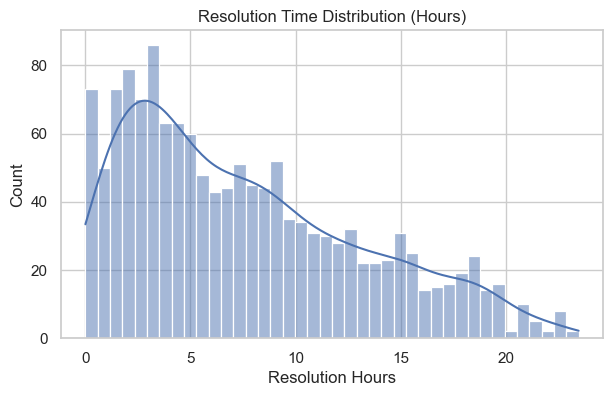

In [23]:
plt.figure(figsize=(7,4))
sns.histplot(df['Resolution_Hours'].dropna(), bins=40, kde=True)
plt.title("Resolution Time Distribution (Hours)")
plt.xlabel("Resolution Hours")
plt.ylabel("Count")
plt.show()


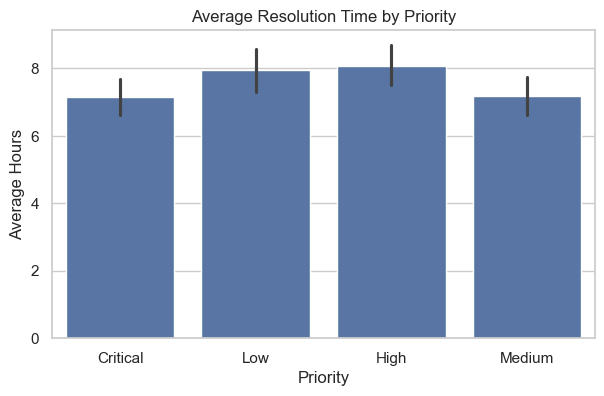

In [24]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Ticket Priority', y='Resolution_Hours',estimator=np.mean)
plt.title("Average Resolution Time by Priority")
plt.xlabel("Priority")
plt.ylabel("Average Hours")
plt.show()


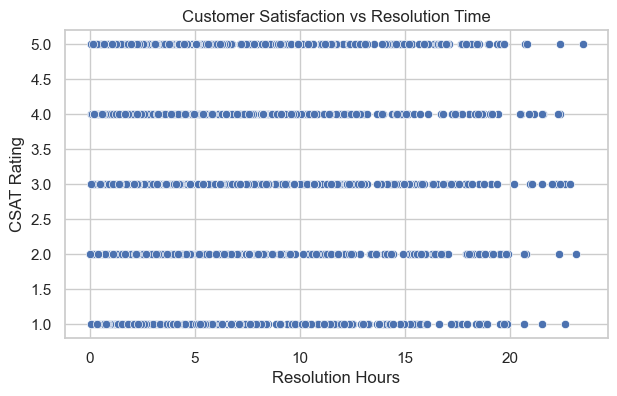

In [25]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Resolution_Hours', y='Customer Satisfaction Rating')
plt.title("Customer Satisfaction vs Resolution Time")
plt.xlabel("Resolution Hours")
plt.ylabel("CSAT Rating")
plt.show()


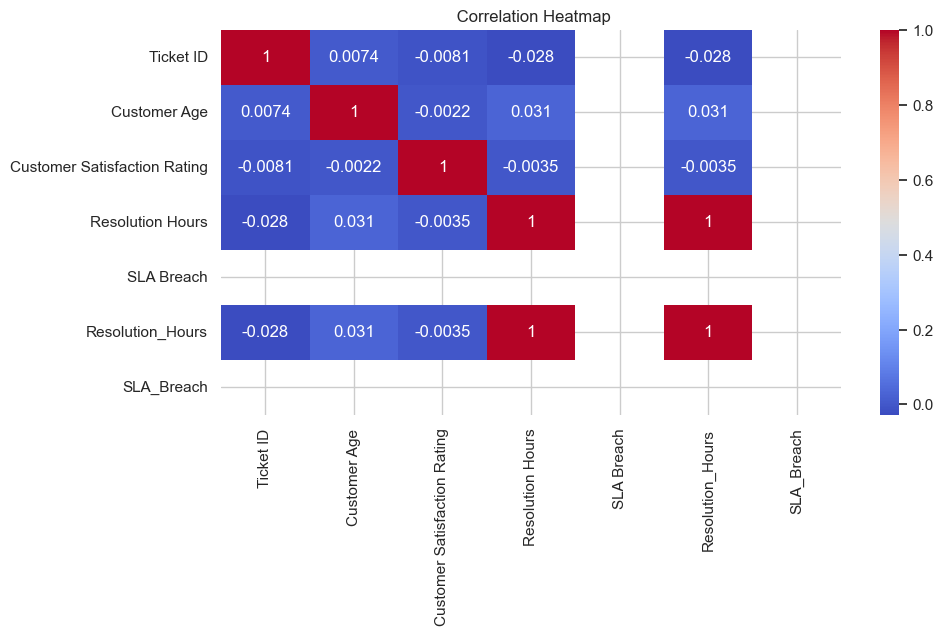

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap")
plt.show()


MACHINE LEARNING MODEL 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [28]:
df_ml = df.dropna(subset=['Resolution_Hours']).copy()
df_ml.shape


(1404, 21)

In [29]:
df_ml.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Resolution Hours', 'SLA Breach',
       'Resolution_Hours', 'SLA_Breach'],
      dtype='object')

In [30]:
# confirm df_ml was created from non-null Resolution_Hours
print("df_ml shape:", df_ml.shape)
print("SLA_Breach value counts (full df):")
print(df['SLA_Breach'].value_counts(dropna=False))
print("\nSLA_Breach value counts (ml df):")
print(df_ml['SLA_Breach'].value_counts(dropna=False))

# Also check distribution of Resolution_Hours
print("\nResolution_Hours summary (ml df):")
print(df_ml['Resolution_Hours'].describe())

# Inspect how many breaches (>24h)
print("\nNumber of breaches (>24h):", (df_ml['Resolution_Hours'] > 24).sum())


df_ml shape: (1404, 21)
SLA_Breach value counts (full df):
SLA_Breach
0    8469
Name: count, dtype: int64

SLA_Breach value counts (ml df):
SLA_Breach
0    1404
Name: count, dtype: int64

Resolution_Hours summary (ml df):
count    1404.000000
mean        7.577932
std         5.596637
min         0.000000
25%         3.000000
50%         6.341667
75%        11.354167
max        23.466667
Name: Resolution_Hours, dtype: float64

Number of breaches (>24h): 0


In [31]:
df_ml.isnull().sum()


Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
Resolution Hours                0
SLA Breach                      0
Resolution_Hours                0
SLA_Breach                      0
dtype: int64

In [32]:
# Define long resolution threshold = 75th percentile
threshold = df_ml['Resolution_Hours'].quantile(0.75)
print("75th percentile threshold (hours):", threshold)

#Create binary target column
df_ml['Long_Resolution'] = (df_ml['Resolution_Hours'] > threshold).astype(int)

#Check balance
print("Class distribution:\n", df_ml['Long_Resolution'].value_counts())


75th percentile threshold (hours): 11.354166666666666
Class distribution:
 Long_Resolution
0    1053
1     351
Name: count, dtype: int64


In [33]:
# Feature selection
X = df_ml[['Ticket Description', 'Ticket Priority', 'Ticket Channel']]
y = df_ml['Long_Resolution']

# Text cleaning
X = X.copy()
X['Ticket Description'] = (
    X['Ticket Description']
    .fillna("")
    .str.lower()
    .str.replace('[^a-zA-Z ]', ' ', regex=True)
    .str.replace('\s+', ' ', regex=True)
)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(max_features=5000), 'Ticket Description'),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), 
                     ['Ticket Priority', 'Ticket Channel'])
    ]
)


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(
        max_iter=2000,
        class_weight='balanced'    # important for imbalance
    ))
])


In [37]:
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('tfidf', ...), ('onehot', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5871886120996441

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       211
           1       0.27      0.37      0.31        70

    accuracy                           0.59       281
   macro avg       0.51      0.52      0.51       281
weighted avg       0.64      0.59      0.61       281


Confusion Matrix:
 [[139  72]
 [ 44  26]]


accureccy is too low so lets use more feature and more powerfull model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# Updated Feature list
X = df_ml[
    [
        'Ticket Description',
        'Ticket Subject',
        'Ticket Priority',
        'Ticket Channel',
        'Ticket Type',
        'Product Purchased',
        'Customer Gender',
        'Customer Age'
    ]
]

y = df_ml['Long_Resolution']

# Text cleaning and Preprocessing
X['Ticket Description'] = (
    X['Ticket Description']
    .fillna("")
    .str.lower()
    .str.replace('[^a-zA-Z ]', ' ', regex=True)
    .str.replace('\s+', ' ', regex=True)
)

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(max_features=7000), 'Ticket Description'),
        ('onehot', OneHotEncoder(handle_unknown='ignore'),
             ['Ticket Subject','Ticket Priority','Ticket Channel','Ticket Type','Product Purchased','Customer Gender']),
        ('scale', StandardScaler(), ['Customer Age'])
    ]
)

# Random Forest Classifier
model_rf = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=20,
        random_state=42,
        class_weight='balanced'
    ))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Train
model_rf.fit(X_train, y_train)

# Evaluate
y_pred = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))
print("\nMatrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\HP\AppData\Local\Temp\ipykernel_14368\456142545.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ticket Description'] = (


Accuracy: 0.7437722419928826

Report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       211
           1       0.33      0.03      0.05        70

    accuracy                           0.74       281
   macro avg       0.54      0.50      0.45       281
weighted avg       0.65      0.74      0.65       281


Matrix:
 [[207   4]
 [ 68   2]]
